# Extract and Visualize Heartbeats (QRS)

This example shows how to use NeuroKit to extract and visualize the QRS complexes (individual heartbeats) from an electrocardiogram (ECG).


## Extract the cleaned ECG signal

In this example, we will use a simulated ECG signal. However, you can use any of your signal (for instance, extracted from the dataframe using the [read_acqknowledge()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.read_acqknowledge>).


In [1]:
# Load the NeuroKit package
import neurokit2 as nk

# Simulate 30 seconds of ECG Signal (recorded at 250 samples / second)
ecg_signal = nk.ecg_simulate(duration=30, sampling_rate=250)

Once you have a raw ECG signal in the shape of a vector (i.e., a one-dimensional array), or a list, you can use [ecg_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_process>) to process it.


In [2]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(ecg_signal, sampling_rate=250)

It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to understand the signal in term of actual time.

This function outputs two elements, a *dataframe* containing the different signals (raw, cleaned, etc.) and a *dictionary* containing various additional information (peaks location, ...).

## Extract R-peaks location


The processing function does two important things for our purpose: 1) it cleans the signal and 2) it detects the location of the R-peaks. Let's extract these from the output.


In [3]:
# Extract clean ECG and R-peasks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

Great. We can visualize the R-peaks location in the signal to make sure it got detected correctly by marking their location in the signal.

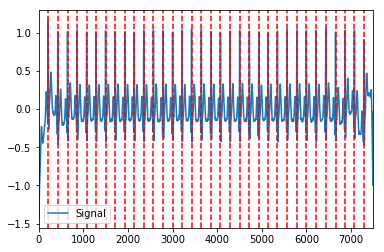

In [4]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)

## Create segments of signal around the heart beats



Once that we know where the R-peaks are located, we can create windows of signal around them (of a length of for instance 1 second, ranging from 400 ms before the R-peak), which we can refer to as *epochs*.


In [5]:
# Segment the signal around the R-peaks
epochs = nk.epochs_create(cleaned_ecg, events=rpeaks, sampling_rate=250, epochs_start=-0.4, epochs_duration=1)


This create a dictionary of dataframes for each 'epoch' (in this case, each heart beat).
    

## Visualize all the heart beats segments


You can now plot all these individual heart beats, synchronized by their R peaks with the [epochs_plot()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.epochs_plot) function.


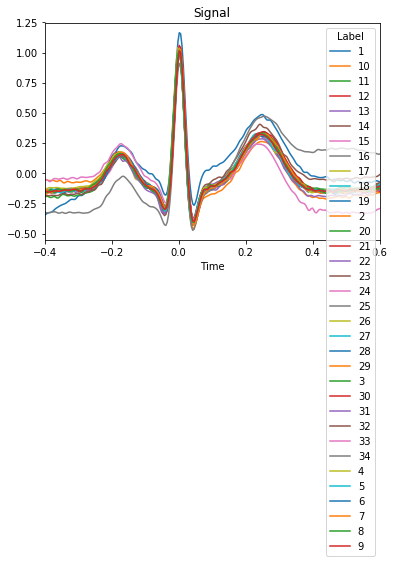

In [24]:
# Plotting all the heart beats
plot = nk.epochs_plot(epochs)